## Is there linear relationship between Win Rate and Kills/Deaths ratio in CS:GO?

### Introduction

As I played almost 300 hours in <font color = 'purple'>Counter-Strike:Global Offensive (CS:GO)</font>, I was really interested in dependence between parameters like hours, win rate, number of bullets shot in round, damage made by players,etc. In this small project, I explore the relationship between Win Rate and Kills/Deaths ratio. Win rate is won matches divided by total number of matches, and it is measured in percents. 

I found very interesting website [csgorankings.com](https://csgorankings.com/). Here we can find many steam users, and their statistics: win rate, accuracy, headshots percentage, total time played in CS:GO, etc. This data is real because it was taken from steam users' profiles that allowed to share their details to public.
Surfing this website, I found a section [Players - Highest Win Rate](https://csgorankings.com/players/winnings) that displays Win Rate and Kills/Deaths ratio of 100 players. I took only 30 observations since it was sufficient for this small project. 

### Checking assumptions

Before we do actual analysis, let us check assumptions of linear regression: <i>normality, linearity, homogeneity of variance, </i>and <i>independece.</i> 

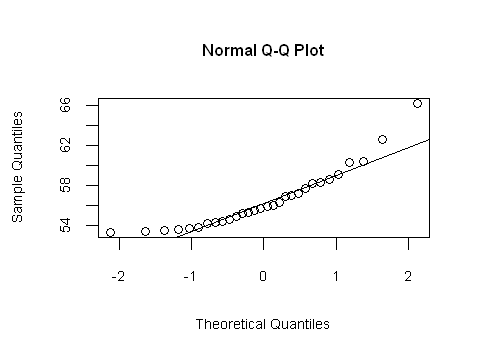

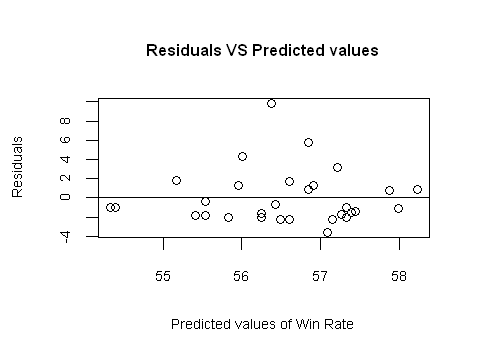

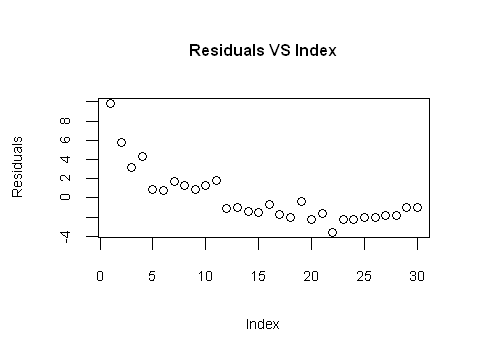

In [ ]:
library(repr)
options(repr.plot.width=4, repr.plot.height=3)
dataset = read.csv('C:/Users/sergazyyev/Desktop/dataset.txt', sep = '\t')
cs_model = lm(Winrate~KD, data = dataset)

#normality
qqnorm(dataset$Winrate, cex.lab = 0.7, cex.main = 0.8, cex.axis = 0.7)
qqline(dataset$Winrate)

#hmgnt of var, linearity
df = data.frame(fitted(cs_model), resid(cs_model))
plot(df, xlab = 'Predicted values of Win Rate', main = 'Residuals VS Predicted values',ylab = 'Residuals', cex.lab = 0.7, 
cex.main = 0.8, cex.axis = 0.7)
abline(h = 0)

#independence
ind = seq(1,length(resid(cs_model)))
plot(ind, resid(cs_model), main = 'Residuals VS Index', xlab = 'Index', ylab = 'Residuals', cex.lab = 0.7, cex.main = 0.8,
cex.axis = 0.7)

Looking at QQ plot, we can say that normality is satisfied because points almost lie on the qqline. <br>
In "Residuals VS Predicted values" plot, points are not equally shifted from the horizontal line. So, linearity and homogeneity of variance do not hold. <br>
In "Residuals VS Index", there is clear pattern that would describe relationship between residuals and index. As index increases, residuals decrease. Hence, observations are not independent. <br>
Now we expect that there is no linear relationship between Win Rate and K/D ratio because assumptions were mostly unsatisfactory.


### Analysis

In this part, I will plot regression model and apply T-test to check if slope is zero or not.

#### Regression model

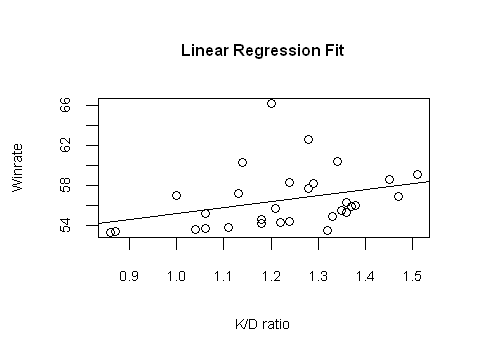

In [ ]:
cs_model = lm(Winrate~KD, data = dataset)
dataframe <- data.frame(dataset[2],dataset[1])
plot(dataframe, main = 'Linear Regression Fit', xlab = 'K/D ratio', ylab = 'Winrate', cex.lab = 0.7, cex.main = 0.8,
cex.axis = 0.7)
abline(cs_model)

## $y = 49.17 + 5.99x$

#### T-test

Below we can see the summary of linear regression model. Let me apply T-test based on information taken from the summary: <br>
I chose significance level of 0.05.  <br>
Null hypothesis: the slope is zero <br>
Alternative hypothesis: the slope is not zero <br>
Since p-value is greater than chosen significance level (0.0787 > 0.05) there is no strong evidence against null hypothesis. So, it is <font color = "red">highly probable</font> that slope could be zero.  <br>

In [ ]:
summary(cs_model)


Call:
lm(formula = Winrate ~ KD, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-3.590 -1.826 -1.031  1.154  9.829 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   49.174      4.068  12.087 1.26e-12 ***
KD             5.998      3.286   1.825   0.0787 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.876 on 28 degrees of freedom
Multiple R-squared:  0.1063,	Adjusted R-squared:  0.0744 
F-statistic: 3.331 on 1 and 28 DF,  p-value: 0.07867


### Conclusion

Assumptions of linear regression were not satisfactory. Also, T-test showed that we cannot say that slope is zero. And if we look at adjusted R-squared, its value (0.0744) means that there is no strong linear relationship between Win Rate and K/D ratio. As a result of analysis, there is no linear relationship between Win Rate and Kills/Deaths ratio in CS:GO. This answers the research question. 

### Discussion


To make assumptions satisfactory, I could apply some transformation on observations. But I thought it was unnecessary in this small project because otherwise it would be more complicated. 
To continue this topic, I am interested in multiple regression where I could consider other parameters (number of MVPs, number of points), and make the project more exciting. 

### Additional Part

I wanted to apply this regression model for my own K/D ratio. As we can see, there is some difference in true value and predicted one. But this does not tell anything about goodness of linear regression model. I just wanted to use it.

In [ ]:
cs_model$coefficients[1] + cs_model$coefficients[2]*1.06
true_winrate = 50.5

(Intercept) 
   55.53107